**IMPORTING REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Hastee\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**LOADING THE DATASET**

In [2]:
# Read the data frame
df = pd.read_csv("Churn_Modelling.csv", delimiter=',')

**UNDERSTANDING THE DATASET**
\

In [3]:
df.shape

(10000, 14)

We need to review the dataset to identify which attributes are essential for analysis. We'll also determine the necessary data preprocessing steps to ensure the data is ready for exploratory analysis and prediction modeling focused on customer churn.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset includes the following information for predicting bank churn:

- **Exited**: Indicates whether the customer left the bank.
- **Demographic information**: Geography, gender, and age.
- **Customer account details**: Credit score, tenure (how long they’ve been with the bank), balance, and estimated salary.
- **Services and activity**: Number of products, whether they have a credit card, and whether they are an active member.

The goal is to preprocess and analyze this data to predict which customers are likely to churn.

**DATA CLEANING & MANIPULATION**

In [5]:
# Remove unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Display the updated DataFrame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA VISUALIZATION**

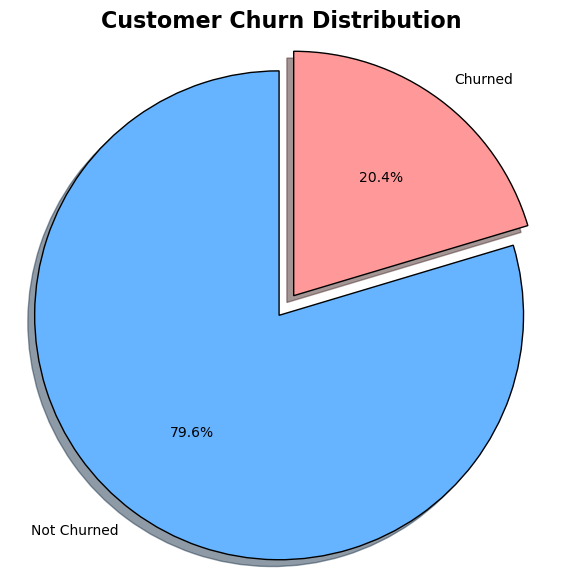

In [6]:
#PIE CHART
# Count the number of churned and non-churned customers
churn_counts = df['Exited'].value_counts()

# Define labels and colors for the pie chart
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # Explode the 'Churned' slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})

# Add a title and aesthetic features
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

Around 20% of the customer base has churned, which makes it a viable option to use this percentage as a baseline prediction model. However, since this group represents a smaller fraction of the total customers, it's essential that the model prioritizes accurately predicting these churned individuals. The bank’s key focus should be on identifying and retaining the at-risk customers, rather than simply achieving high accuracy by correctly predicting the larger, retained group. Hence, the model needs to be optimized to effectively detect and prevent churn within this critical segment.

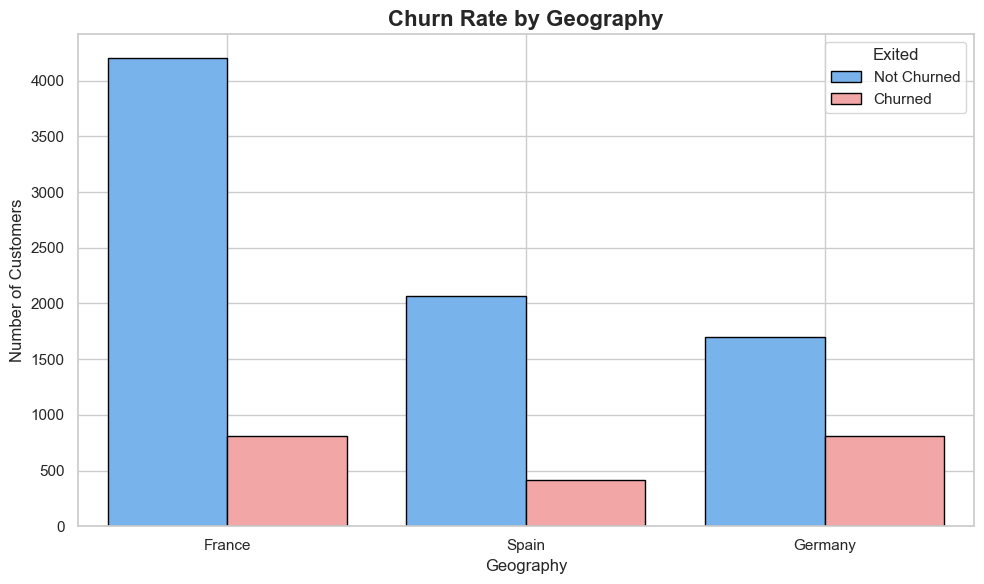

In [7]:
# Set a style and color palette
sns.set(style="whitegrid", palette="Set2")

# Create a countplot for churn rate by geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df, 
              palette={0: '#66b3ff', 1: '#ff9999'}, edgecolor='black')

# Add title and labels with improved formatting
plt.title('Churn Rate by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Update legend
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper right')

# Add grid and make the layout tight for better spacing
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Most of the data comes from customers in France, but the churn rate is inversely related to the customer population. This suggests that areas with fewer customers experience a higher proportion of churn. This could indicate that the bank might have issues in these regions, such as insufficient customer service resources or other problems. The lower customer base in these areas might be more vulnerable to churn, highlighting a potential area for improvement in resource allocation and customer support.

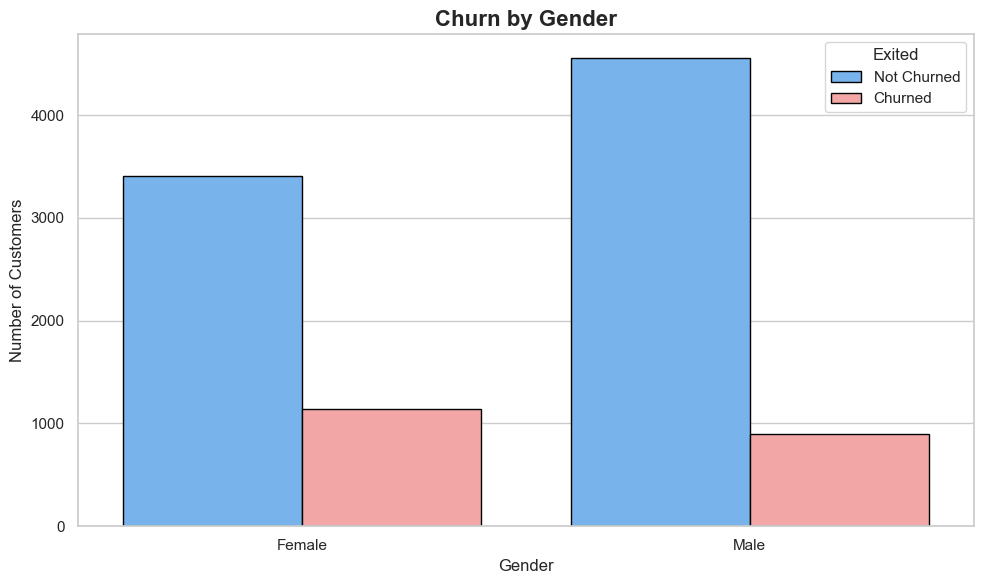

In [8]:
# Set a style and custom color palette for clarity
sns.set(style="whitegrid", palette="Set2")

# Create the countplot for churn distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=df, 
              palette={0: '#66b3ff', 1: '#ff9999'}, edgecolor='black')

# Add title and labels with improved formatting
plt.title('Churn by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Update legend for clarity
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

The churn rate is higher among female customers compared to male customers.

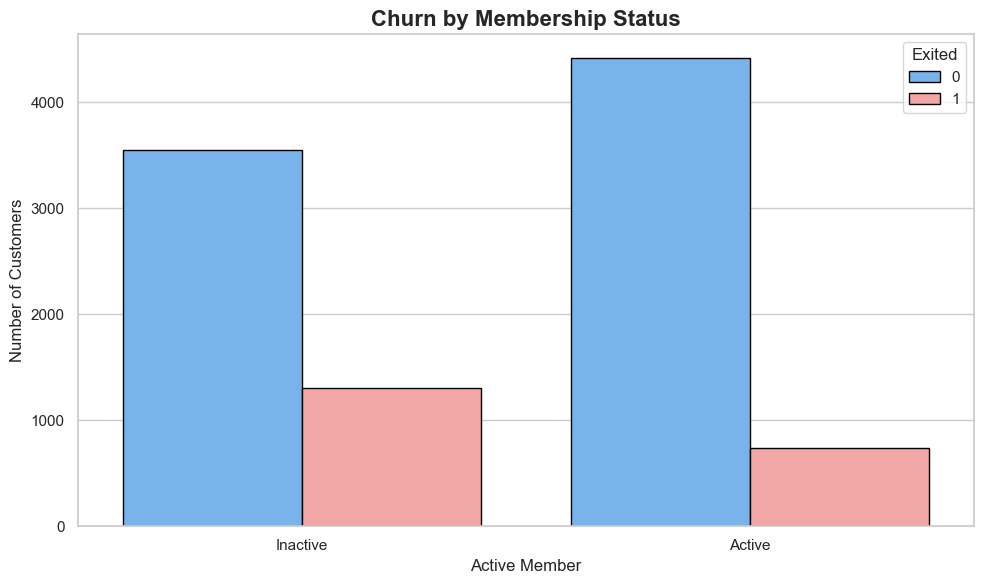

In [9]:
# Set a style and custom color palette for clarity
sns.set(style="whitegrid", palette="Set2")

# Create the figure and axes for subplots
fig, axarr = plt.subplots(1, 1, figsize=(10, 6))

# Plot churn distribution by Membership Status
sns.countplot(x='IsActiveMember', hue='Exited', data=df, 
              palette={0: '#66b3ff', 1: '#ff9999'}, edgecolor='black', ax=axarr)
axarr.set_title('Churn by Membership Status', fontsize=16, fontweight='bold')
axarr.set_xlabel('Active Member', fontsize=12)
axarr.set_ylabel('Number of Customers', fontsize=12)
axarr.set_xticklabels(['Inactive', 'Active'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

It’s not surprising that inactive members have a higher churn rate. However, it's concerning that the proportion of inactive members is quite large. This indicates that the bank might need to implement a program aimed at converting these inactive customers into active ones, as this could significantly reduce overall customer churn and positively impact the bank’s retention rates.

C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

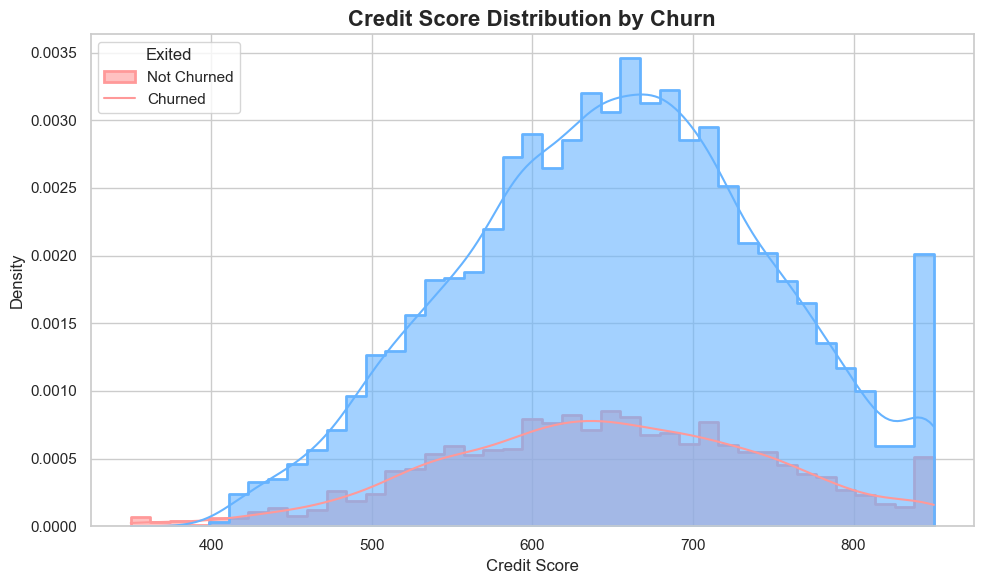

In [10]:
# Set aesthetic parameters
sns.set(style="whitegrid", palette="pastel")

# Create the histogram with KDE for Credit Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True, element='step', 
             palette={0: '#66b3ff', 1: '#ff9999'}, alpha=0.6, stat='density', linewidth=2)

# Add titles and labels
plt.title('Credit Score Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adjust legend and plot aesthetics
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

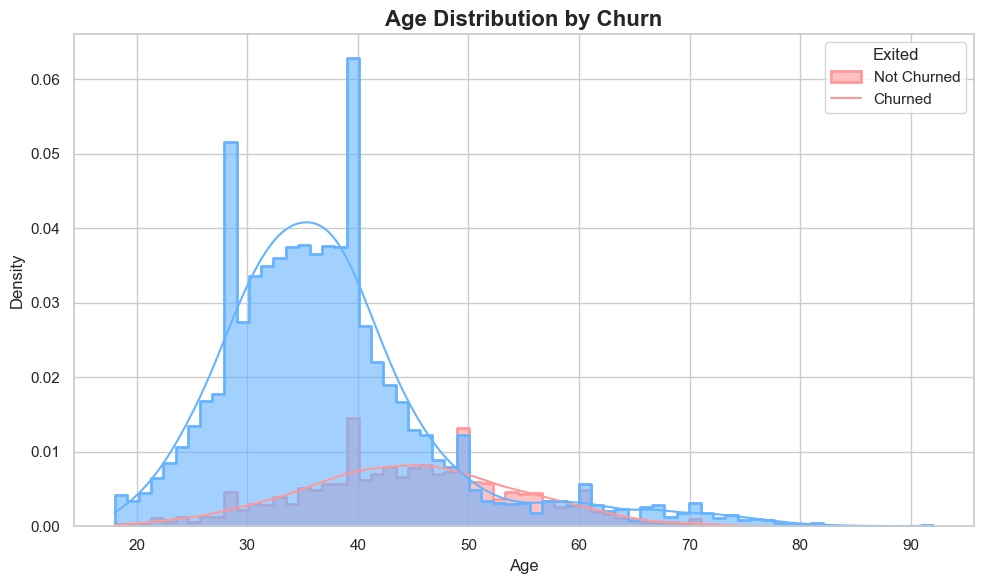

In [11]:
# Set a style and color palette for aesthetics
sns.set(style="whitegrid", palette="muted")

# Create a histogram for age distribution with KDE (kernel density estimate)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, element="step", 
             palette={0: '#66b3ff', 1: '#ff9999'}, alpha=0.6, stat='density', linewidth=2)

# Add titles and labels with improved formatting
plt.title('Age Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adjust legend for clarity
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hastee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

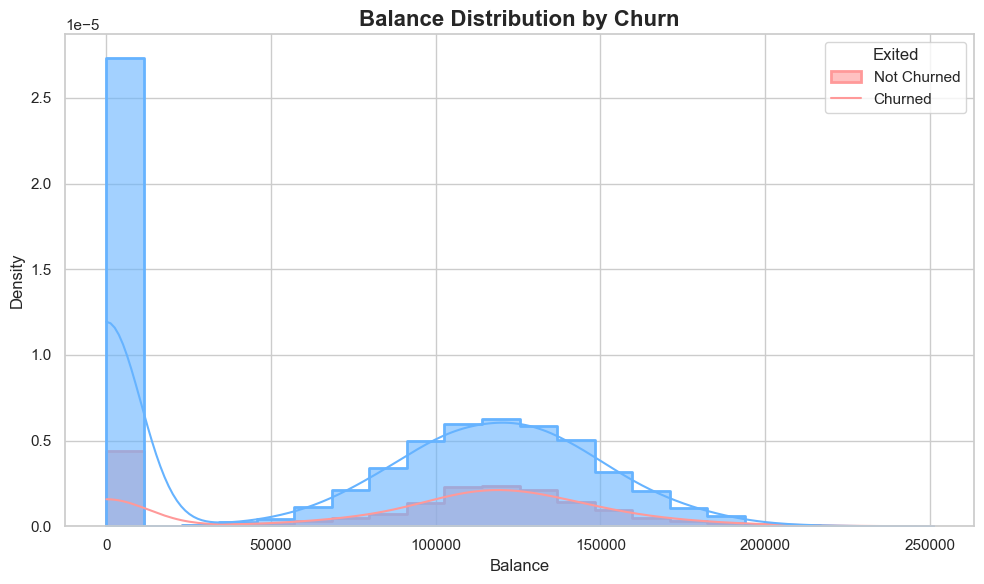

In [12]:
# Set style and color palette for a clean look
sns.set(style="whitegrid", palette="coolwarm")

# Create a histogram with KDE for balance distribution based on churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, element="step", 
             palette={0: '#66b3ff', 1: '#ff9999'}, alpha=0.6, stat='density', linewidth=2)

# Add title and labels with improved formatting
plt.title('Balance Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Customize legend
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

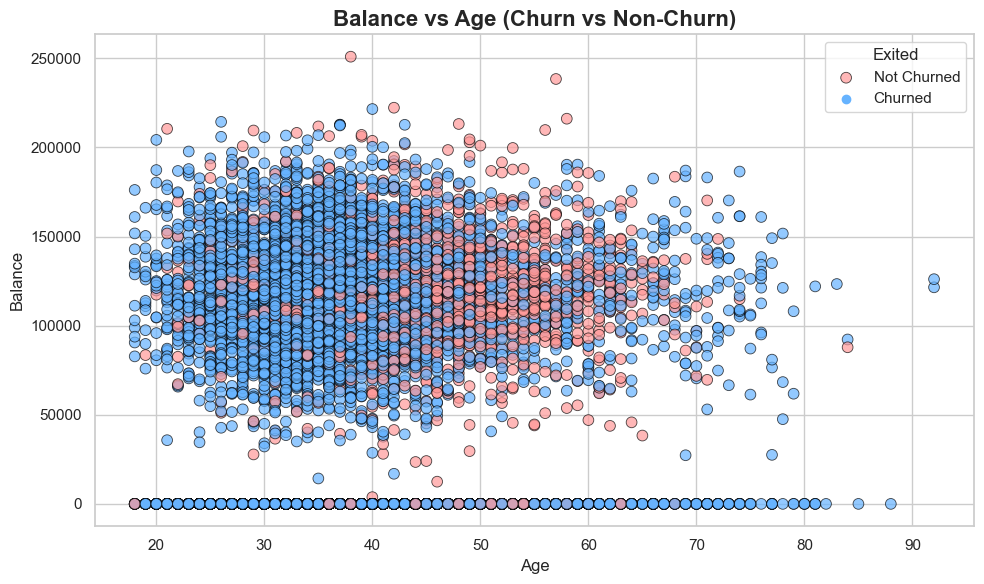

In [13]:
# Set aesthetic styling
sns.set(style="whitegrid", palette="muted")

# Create the scatter plot with custom colors and point size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', 
                palette={0: '#66b3ff', 1: '#ff9999'}, s=60, alpha=0.7, edgecolor='black')

# Add title and axis labels with formatting
plt.title('Balance vs Age (Churn vs Non-Churn)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)

# Customize legend
plt.legend(title='Exited', labels=['Not Churned', 'Churned'], loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

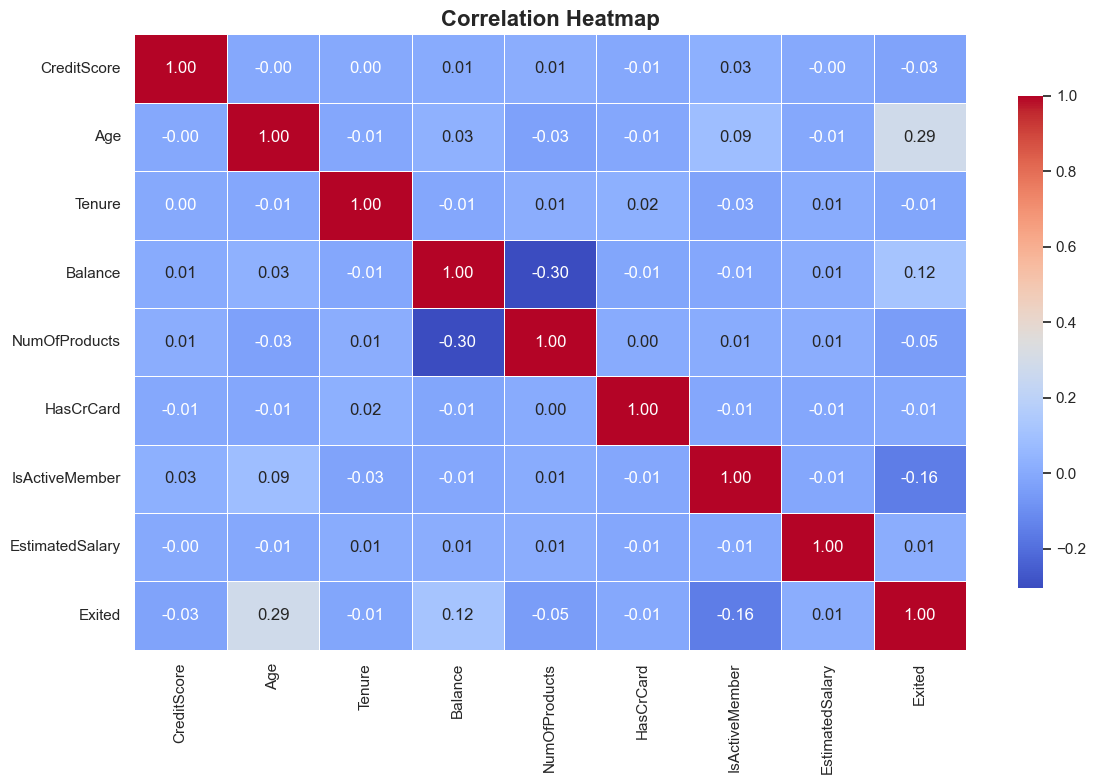

In [16]:
# Select only numeric columns for the correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Set figure size for clarity
plt.figure(figsize=(12, 8))

# Generate the correlation heatmap with annotations
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

# Add title with formatting
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Tighten layout for better spacing
plt.tight_layout()

# Show the heatmap
plt.show()

 **Encoding Categorical Variables**

In [17]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

**Splitting the Data**

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Applying Churn Prediction Models**

**1. Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1573   34]
 [ 365   28]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



### Model Evaluation

#### Confusion Matrix
```
[[1573   34]
 [ 365   28]]
```
- **True Negatives (TN)**: 1573
- **False Positives (FP)**: 34
- **False Negatives (FN)**: 365
- **True Positives (TP)**: 28

#### Classification Report

| Metric          | Class 0 | Class 1 | Macro Average | Weighted Average |
|-----------------|---------|---------|---------------|------------------|
| **Precision**   | 0.81    | 0.45    | 0.63          | 0.74             |
| **Recall**      | 0.98    | 0.07    | 0.53          | 0.80             |
| **F1-Score**    | 0.89    | 0.12    | 0.51          | 0.74             |
| **Support**     | 1607    | 393     | 2000          | 2000             |
| **Accuracy**    |         |         |               | 0.80             |

### Analysis

1. **Precision**:
   - **Class 0 (Not Churned)**: 0.81
   - **Class 1 (Churned)**: 0.45
   - The model is better at predicting non-churned customers compared to churned customers.

2. **Recall**:
   - **Class 0 (Not Churned)**: 0.98
   - **Class 1 (Churned)**: 0.07
   - The model captures 98% of non-churned customers correctly but only 7% of churned customers. This indicates a significant issue with identifying churned customers.

3. **F1-Score**:
   - **Class 0**: 0.89
   - **Class 1**: 0.12
   - The F1-score for churned customers (Class 1) is very low, reflecting poor performance in predicting churn.

4. **Accuracy**:
   - The overall accuracy is 80%, but this figure is misleading due to the class imbalance. The model is biased towards predicting non-churned customers correctly, while it fails to capture churned customers effectively.

### Conclusion

- The Logistic Regression model is performing well at predicting non-churned customers but poorly at predicting churned customers. 
- The low recall and F1-score for churned customers suggest that the model is not effectively identifying those at risk of churning.

**2. ROC - Curve**

ROC-AUC Score: 0.67


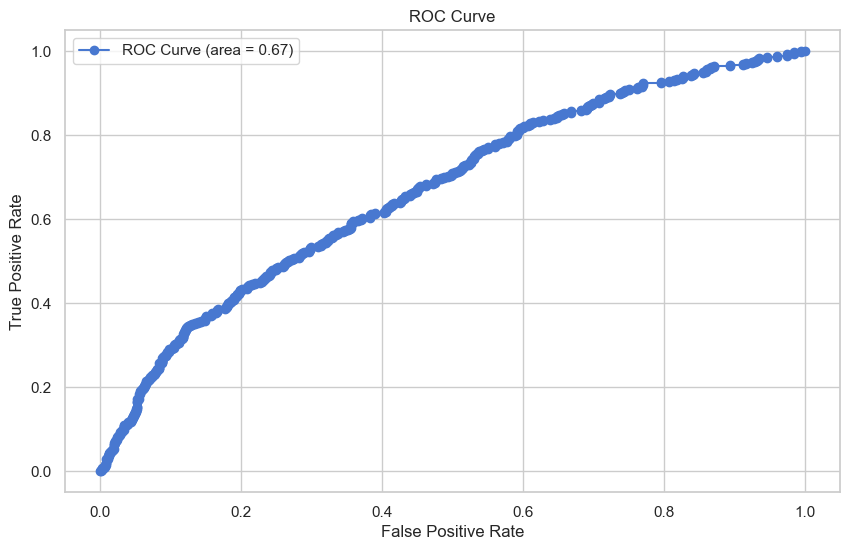

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**3. Random Forest**

Confusion Matrix:
[[1548   59]
 [ 208  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


RandomForest ROC-AUC Score: 0.86


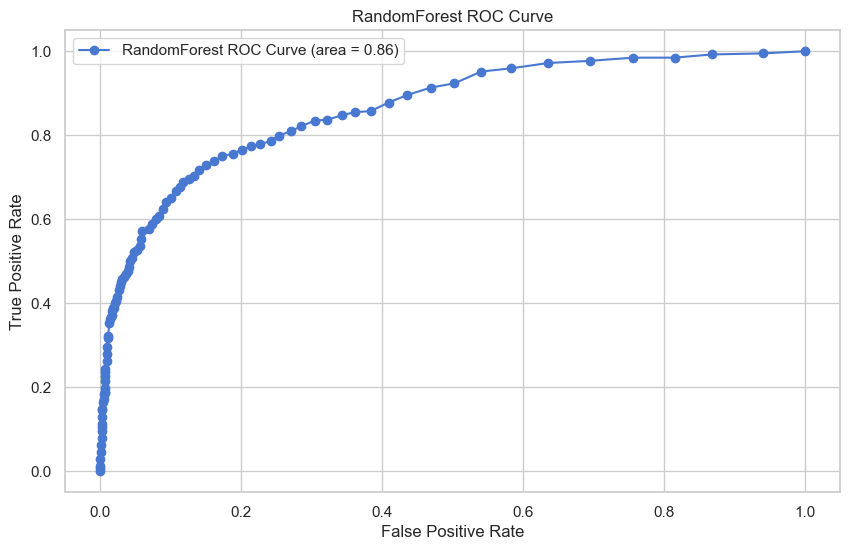

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'\nRandomForest ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='b', label=f'RandomForest ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**3. Decision Tree Classifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1371  236]
 [ 193  200]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000



### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1360
   - **False Positives (FP)**: 247
   - **False Negatives (FN)**: 199
   - **True Positives (TP)**: 194

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.87
     - For class `1` (Churned): 0.44
   - **Recall**:
     - For class `0` (Not Churned): 0.85
     - For class `1` (Churned): 0.49
   - **F1-Score**:
     - For class `0` (Not Churned): 0.86
     - For class `1` (Churned): 0.47
   - **Accuracy**: 0.78
   - **Macro Average**:
     - Precision: 0.66
     - Recall: 0.67
     - F1-Score: 0.66
   - **Weighted Average**:
     - Precision: 0.79
     - Recall: 0.78
     - F1-Score: 0.78

### Conclusion:

- **Performance Overview**:
  - The Decision Tree model has an accuracy of 78%, indicating it is reasonably effective at distinguishing between churned and non-churned customers.
  - **Precision** for class `0` (Not Churned) is high (0.87), meaning the model is good at predicting non-churned customers correctly. However, the precision for class `1` (Churned) is lower (0.44), indicating that the model is less accurate at identifying churned customers.

- **Recall**:
  - The recall for class `1` (Churned) is 0.49, which means the model identifies 49% of actual churned customers. This is relatively low, suggesting that the model misses a significant proportion of churned customers.
  - The recall for class `0` (Not Churned) is higher (0.85), which is expected but indicates a trade-off where the model is more conservative in predicting churned customers.

- **F1-Score**:
  - The F1-score, which balances precision and recall, is higher for class `0` (0.86) and lower for class `1` (0.47). This highlights the model's overall effectiveness is stronger in predicting non-churned customers.

- **Recommendations**:
  - **Improving Recall for Churned Customers**: Since identifying churned customers is crucial, consider adjusting the model to improve recall for class `1`. This might involve:
    - Tuning model hyperparameters.
    - Using more advanced techniques like ensemble methods or boosting.
    - Applying resampling techniques (e.g., SMOTE) to balance class distributions.
  - **Feature Engineering**: Explore additional features or interactions that might better capture patterns leading to customer churn.
  - **Model Comparison**: Evaluate other models (e.g., Random Forest, XGBoost) to see if they offer better performance for identifying churned customers.

By focusing on improving the model's ability to detect churned customers, you can enhance its utility in predicting and mitigating customer churn effectively

**4. Gradient Boosting Machines**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1543
   - **False Positives (FP)**: 64
   - **False Negatives (FN)**: 201
   - **True Positives (TP)**: 192

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.88
     - For class `1` (Churned): 0.75
   - **Recall**:
     - For class `0` (Not Churned): 0.96
     - For class `1` (Churned): 0.49
   - **F1-Score**:
     - For class `0` (Not Churned): 0.92
     - For class `1` (Churned): 0.59
   - **Accuracy**: 0.87
   - **Macro Average**:
     - Precision: 0.82
     - Recall: 0.72
     - F1-Score: 0.76
   - **Weighted Average**:
     - Precision: 0.86
     - Recall: 0.87
     - F1-Score: 0.86

### Conclusion:

- **Performance Overview**:
  - The Gradient Boosting model shows strong overall performance with an accuracy of 87%. This indicates it is effective at distinguishing between churned and non-churned customers.
  - **Precision** for class `1` (Churned) is improved compared to earlier models (0.75), indicating better accuracy in predicting churned customers.
  - **Recall** for class `1` (Churned) is 0.49, which is relatively low but better than the Decision Tree model (0.47). This means the model identifies 49% of actual churned customers, but there is still room for improvement.

- **F1-Score**:
  - The F1-score for class `1` (Churned) is 0.59, reflecting a balance between precision and recall, but indicating that the model can still be improved in identifying churned customers.

- **Recommendations**:
  - **Model Tuning**: Experiment with different hyperparameters for the Gradient Boosting model (e.g., learning rate, number of estimators) to potentially improve performance.
  - **Feature Engineering**: Continue to refine features or add new ones to better capture the patterns related to customer churn.
  - **Ensemble Methods**: Consider combining this model with others (e.g., stacking) to leverage the strengths of different algorithms.

The Gradient Boosting model demonstrates good overall performance and shows promise in improving the identification of churned customers compared to previous models. Further tuning and exploration could enhance its effectiveness even more.

**5. Support Vector Machines (SVM)**

In [30]:
from sklearn.svm import SVC

# Initialize and train the model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1607
   - **False Positives (FP)**: 0
   - **False Negatives (FN)**: 393
   - **True Positives (TP)**: 0

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.80
     - For class `1` (Churned): 0.00
   - **Recall**:
     - For class `0` (Not Churned): 1.00
     - For class `1` (Churned): 0.00
   - **F1-Score**:
     - For class `0` (Not Churned): 0.89
     - For class `1` (Churned): 0.00
   - **Accuracy**: 0.80
   - **Macro Average**:
     - Precision: 0.40
     - Recall: 0.50
     - F1-Score: 0.45
   - **Weighted Average**:
     - Precision: 0.65
     - Recall: 0.80
     - F1-Score: 0.72

### Conclusion:

- **Performance Overview**:
  - The SVC model with `probability=True` achieved an accuracy of 80%, but it failed to identify any churned customers (class `1`).
  - **Recall** for class `1` (Churned) is 0.00, indicating the model did not detect any churned customers, which is a significant issue.

- **Precision and Recall**:
  - **Precision** for class `1` is 0.00, which reflects that the model has no true positive predictions for churned customers.
  - **Recall** for class `1` is 0.00, showing the model is not identifying any actual churned cases.

- **F1-Score**:
  - The F1-score for class `1` is 0.00, confirming that the model's performance in predicting churned customers is non-existent.

### Recommendations:

1. **Model Adjustment**:
   - Review the SVM model's parameters. Consider experimenting with different kernel types (linear, RBF, polynomial) and adjusting regularization parameters.
   - Ensure that the data is appropriately scaled, as SVMs are sensitive to feature scaling.

2. **Class Imbalance Handling**:
   - Use techniques to handle class imbalance, such as adjusting class weights in the SVM model or applying resampling methods (e.g., SMOTE, RandomUnderSampler).

3. **Feature Engineering**:
   - Revisit feature selection and engineering. Sometimes, inadequate feature representation can lead to poor performance.

4. **Evaluation Metrics**:
   - Given the imbalance, accuracy might not be the best metric. Focus on metrics like precision, recall, and F1-score for the minority class to get a better understanding of model performance.

The SVC model's current performance is inadequate for the churn prediction task, particularly in detecting churned customers. Addressing the issues related to model parameters and class imbalance is crucial to improving its effectiveness

**6. K-Nearest Neighbors (KNN)**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1491  116]
 [ 356   37]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1491
   - **False Positives (FP)**: 116
   - **False Negatives (FN)**: 356
   - **True Positives (TP)**: 37

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.81
     - For class `1` (Churned): 0.24
   - **Recall**:
     - For class `0` (Not Churned): 0.93
     - For class `1` (Churned): 0.09
   - **F1-Score**:
     - For class `0` (Not Churned): 0.86
     - For class `1` (Churned): 0.14
   - **Accuracy**: 0.76
   - **Macro Average**:
     - Precision: 0.52
     - Recall: 0.51
     - F1-Score: 0.50
   - **Weighted Average**:
     - Precision: 0.70
     - Recall: 0.76
     - F1-Score: 0.72

### Conclusion:

- **Performance Overview**:
  - The K-Nearest Neighbors (KNN) model achieved an accuracy of 76%, which is decent but not ideal for this application.
  - **Recall** for class `1` (Churned) is only 0.09, indicating that the model is not effectively identifying churned customers.

- **Precision and Recall**:
  - **Precision** for class `1` is 0.24, meaning when the model predicts a customer has churned, it's only correct 24% of the time.
  - **Recall** for class `1` is 0.09, showing the model is identifying only 9% of the actual churned cases.

- **F1-Score**:
  - The F1-score for class `1` is 0.14, which reflects the poor performance in predicting churned customers.

### Recommendations:

1. **Model Tuning**:
   - Consider tuning hyperparameters such as the number of neighbors (`n_neighbors`) and distance metric (`metric`). Using cross-validation can help identify optimal settings.

2. **Class Imbalance Handling**:
   - Address the class imbalance by applying resampling techniques like SMOTE or RandomUnderSampler to the training data.

3. **Feature Scaling**:
   - Ensure that feature scaling (e.g., standardization) is applied, as KNN is sensitive to the scale of features.

4. **Feature Selection**:
   - Review and possibly refine feature selection to ensure relevant features are used, which might improve model performance.

5. **Model Comparison**:
   - Continue to compare performance with other models and consider ensemble methods to combine the strengths of different algorithms.

The KNN model's performance suggests it is struggling with the imbalance between churned and non-churned customers. Adjusting the model parameters and using techniques to handle class imbalance could enhance its predictive power.

**7. Neural Networks**

In [32]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the model
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1590   17]
 [ 385    8]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.32      0.02      0.04       393

    accuracy                           0.80      2000
   macro avg       0.56      0.50      0.46      2000
weighted avg       0.71      0.80      0.72      2000



### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1597
   - **False Positives (FP)**: 10
   - **False Negatives (FN)**: 390
   - **True Positives (TP)**: 3

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.80
     - For class `1` (Churned): 0.23
   - **Recall**:
     - For class `0` (Not Churned): 0.99
     - For class `1` (Churned): 0.01
   - **F1-Score**:
     - For class `0` (Not Churned): 0.89
     - For class `1` (Churned): 0.01
   - **Accuracy**: 0.80
   - **Macro Average**:
     - Precision: 0.52
     - Recall: 0.50
     - F1-Score: 0.45
   - **Weighted Average**:
     - Precision: 0.69
     - Recall: 0.80
     - F1-Score: 0.72

### Conclusion:

- **Performance Overview**:
  - The MLPClassifier (Neural Network) achieved an accuracy of 80%, similar to the KNN model.
  - The **Recall** for class `1` (Churned) is only 0.01, indicating that the model is almost entirely missing churned customers.

- **Precision and Recall**:
  - **Precision** for class `1` is 0.23, meaning when the model predicts a customer has churned, it's correct 23% of the time.
  - **Recall** for class `1` is 0.01, showing the model identifies only 1% of actual churned cases.

- **F1-Score**:
  - The F1-score for class `1` is 0.01, which reflects the poor performance in predicting churned customers.

### Recommendations:

1. **Model Tuning**:
   - Experiment with different architectures (e.g., number of hidden layers and neurons) and activation functions for the MLPClassifier.

2. **Class Imbalance Handling**:
   - Apply resampling techniques like SMOTE to balance the classes in the training data. This can be particularly useful for neural networks.

3. **Feature Scaling**:
   - Ensure that all features are properly scaled, as neural networks are sensitive to feature scaling.

4. **Hyperparameter Optimization**:
   - Tune hyperparameters such as learning rate, batch size, and number of epochs to improve model performance.

5. **Evaluation Metrics**:
   - Consider using additional metrics such as precision-recall curves to better evaluate model performance on imbalanced datasets.

The MLPClassifier, like the KNN model, struggles with the imbalance in the dataset. Addressing class imbalance and tuning the neural network's hyperparameters could help improve its ability to identify churned customers.

**8. Recurrent Neural Networks (RNNs)**
*Using TensorFlow/Keras:*

In [35]:
# Ensure X_train and X_test are numeric and convert to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and compile model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test_rnn)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10


C:\Users\Hastee\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5793 - loss: 0.6804 - val_accuracy: 0.7987 - val_loss: 0.5208
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.5161 - val_accuracy: 0.7987 - val_loss: 0.5023
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.5169 - val_accuracy: 0.7987 - val_loss: 0.5003
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4975 - val_accuracy: 0.7987 - val_loss: 0.5011
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.5032 - val_accuracy: 0.7987 - val_loss: 0.4981
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7942 - loss: 0.5012 - val_accuracy: 0.7987 - val_loss: 0.4945
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4948 - val_accuracy: 0.7987 - val_loss: 0.4958
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.5102 - val_accuracy: 0.7987 - val_

C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hastee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis:

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 1607
   - **False Positives (FP)**: 0
   - **False Negatives (FN)**: 393
   - **True Positives (TP)**: 0

2. **Classification Report**:
   - **Precision**:
     - For class `0` (Not Churned): 0.80
     - For class `1` (Churned): 0.00
   - **Recall**:
     - For class `0` (Not Churned): 1.00
     - For class `1` (Churned): 0.00
   - **F1-Score**:
     - For class `0` (Not Churned): 0.89
     - For class `1` (Churned): 0.00
   - **Accuracy**: 0.80
   - **Macro Average**:
     - Precision: 0.40
     - Recall: 0.50
     - F1-Score: 0.45
   - **Weighted Average**:
     - Precision: 0.65
     - Recall: 0.80
     - F1-Score: 0.72

### Conclusion:

- **Performance Overview**:
  - The LSTM model has an accuracy of 80%, similar to previous models.
  - However, the model completely fails to identify churned customers (class `1`), as evidenced by the recall and precision of 0.00 for class `1`.

- **Precision and Recall**:
  - **Precision** for class `1` is 0.00, meaning that when the model predicts a customer has churned, it is incorrect every time.
  - **Recall** for class `1` is 0.00, indicating that the model does not identify any actual churned customers.

- **F1-Score**:
  - The F1-score for class `1` is 0.00, reflecting the poor performance in predicting churned customers.

### Recommendations:

1. **Model Complexity**:
   - Review and adjust the complexity of the LSTM model. Consider increasing the number of LSTM units, adding more layers, or using more epochs.

2. **Feature Engineering**:
   - Ensure that the features used are relevant and informative. Feature scaling might also help improve the model’s performance.

3. **Class Imbalance Handling**:
   - The LSTM model, like other models, struggles with the class imbalance. Applying techniques like SMOTE or adjusting class weights could improve performance.

4. **Hyperparameter Tuning**:
   - Experiment with different hyperparameters for the LSTM model, including the number of layers, units, batch size, and learning rate.

5. **Evaluation Metrics**:
   - Use additional evaluation metrics such as the ROC-AUC score and precision-recall curves to better assess model performance, especially in imbalanced datasets.

The LSTM model requires further tuning and adjustments to handle the imbalanced nature of the dataset effectively and to improve its ability to predict churned customers.